# Example using cpnest

An example of fitting the parameters of a straight line using [cpnest](https://johnveitch.github.io/cpnest/).

In [1]:
%matplotlib inline

import numpy as np
import cpnest

import corner

In [2]:
import cpnest.model

LN2PI = np.log(2.*np.pi)

# set the model, likelihood and prior
class StraightLineModel(cpnest.model.Model):
    """
    A simple straight line model, with a Gaussian likelihood
    """
    names=['m','c'] # parameter names (this is a required variables for the class)
    bounds=[[-10.,10.], [-10.,10.]] # upper and lower bounds on each parameter (required for the class)
    
    def __init__(self, data, abscissa, sigma=1., mbounds=None, cbounds=None):
        # set the data
        self._data = data         # oberserved data
        self._abscissa = abscissa # points at which the observed data are taken
        self._sigma = sigma       # standard deviation(s) of the data
        self._logsigma = np.log(sigma)
        self._ndata = len(data)   # number of data points
    
        # check if bounds a supplied
        tmpbounds = []
        for i, tbounds in enumerate([mbounds, cbounds]):
            if tbounds is not None:
                if isinstance(tbounds, list):
                    if len(tbounds) != 2:
                        raise IOError("'bounds' must be a list with two values")
                    else:
                        tmpbounds.append(tbounds)
                else:
                    tmpbounds.append(self.bounds[i]) # default pre-set values
            else:
                tmpbounds.append(self.bounds[i]) # default pre-set values
        self.bounds = tmpbounds

    def log_likelihood(self,x):
        # set log-likelihood - x will be a dictionary of parameter names
        m = x['m']
        c = x['c']
        
        model = c + m*self._abscissa # define the model
        
        logL = -0.5*self._ndata*LN2PI - self._ndata*self._logsigma # normalisation
        logL -= 0.5*np.sum((self._data - model)**2)/(self._sigma**2)
        
        return logL

    def log_prior(self,p):
        if not self.in_bounds(p): return -np.inf # check parameters are all in bounds
        return 0 # uniform priors


In [3]:
# set true gradient and y-intercept for a linear model
m = 3.5 # gradient
c = 1.2 # y-intercept

# set the "predictor variable"/abscissa
x = np.linspace(0., 10., 100) # 100 points linearly spaced between 0 and 10

# create some "data" - the model plus Gaussian noise
sigma = 0.4 # standard deviation of noise
y = m*x + c + np.random.randn(len(x))*sigma

In [4]:
# run cpnest
work = cpnest.CPNest(StraightLineModel(y, x, sigma=sigma),verbose=1,Nthreads=2,Nlive=1024,maxmcmc=1024)
work.run()

Running with 2 parallel threads


sampling the prior --> 100 % complete


1: n:   7 acc:0.714 sub_acc:0.714 H: 0.00 logL -2289438.99208 --> -574403.71686 dZ: 2289267.699 logZ: -2289445.924 logLmax: -178.22
2: n:   6 acc:1.000 sub_acc:1.000 H: 6.93 logL -2268364.30121 --> -1075684.10612 dZ: 2268193.008 logZ: -2268371.234 logLmax: -178.22
3: n:   6 acc:0.333 sub_acc:0.333 H: 6.93 logL -2247264.35779 --> -552362.75320 dZ: 2247093.065 logZ: -2247271.292 logLmax: -178.22
4: n:   6 acc:0.667 sub_acc:0.667 H: 6.93 logL -2245340.34015 --> -151233.65834 dZ: 2245169.047 logZ: -2245347.275 logLmax: -178.22
5: n:   6 acc:0.667 sub_acc:0.667 H: 6.94 logL -2162633.40827 --> -136657.29156 dZ: 2162462.115 logZ: -2162640.344 logLmax: -178.22
6: n:   6 acc:0.333 sub_acc:0.333 H: 6.94 logL -2157255.18667 --> -651341.23388 dZ: 2157083.894 logZ: -2157262.124 logLmax: -178.22
7: n:   6 acc:0.500 sub_acc:0.500 H: 6.94 logL -2138033.62968 --> -68713.05496 dZ: 2137862.337 logZ: -2138040.567 logLmax: -178.22
8: n:   6 acc:0.333 sub_acc:0.333 H: 6.94 logL -2135560.56319 --> -1148527.6

Sampler process 8341: MCMC samples accumulated = 0
Sampler process 8341: Mean ACL measured (suggested thinning) = 7
Sampler process 8342: MCMC samples accumulated = 0
Sampler process 8342: Mean ACL measured (suggested thinning) = 6


14114: n:   4 acc:0.375 sub_acc:0.750 H: 10.78 logL -45.42563 --> -45.40296 dZ: 0.146 logZ: -57.222 logLmax: -45.29
14115: n:   4 acc:0.750 sub_acc:0.750 H: 10.78 logL -45.42551 --> -45.35494 dZ: 0.145 logZ: -57.222 logLmax: -45.29
14116: n:   4 acc:0.250 sub_acc:0.250 H: 10.78 logL -45.42517 --> -45.36553 dZ: 0.145 logZ: -57.222 logLmax: -45.29
14117: n:   4 acc:0.750 sub_acc:0.750 H: 10.78 logL -45.42516 --> -45.34795 dZ: 0.145 logZ: -57.222 logLmax: -45.29
14118: n:   4 acc:0.250 sub_acc:0.500 H: 10.78 logL -45.42479 --> -45.37746 dZ: 0.145 logZ: -57.221 logLmax: -45.29
14119: n:   4 acc:0.375 sub_acc:0.750 H: 10.78 logL -45.42479 --> -45.37308 dZ: 0.145 logZ: -57.221 logLmax: -45.29
14120: n:   4 acc:0.500 sub_acc:1.000 H: 10.78 logL -45.42469 --> -45.32623 dZ: 0.145 logZ: -57.221 logLmax: -45.29
14121: n:   4 acc:0.250 sub_acc:0.250 H: 10.78 logL -45.42453 --> -45.34487 dZ: 0.144 logZ: -57.221 logLmax: -45.29
14122: n:   4 acc:0.250 sub_acc:0.750 H: 10.78 logL -45.42448 --> -45.40

Sampler process 8341: exiting
Sampler process 8342: exiting


Final evidence: -57.09
Information: 10.78
Computed log_evidences: (-57.091253344018277,)
Relative weights of input files: [1.0]
Relative weights of input files taking into account their length: [1.0]
Number of input samples: [15504]
Expected number of samples from each input file [2794]
Samples produced: 2794


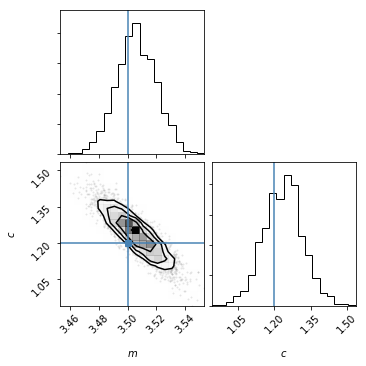

In [5]:
# get posterior samples and plot
mchain = work.posterior_samples['m']
cchain = work.posterior_samples['c']

# plot using corner.py
fig = corner.corner(np.array([mchain, cchain]).T, labels=[r'$m$', r'$c$'], truths=[m, c])

In [6]:
# get the log marginal likelihood (evidence) for the model given the data
logZ = work.NS.logZ

# get the null log likelihood (evidence that the data is Gaussian noise with zero mean, and given standard devaition)
logZnull = work.user.log_likelihood({'m': 0., 'c': 0.})

# output the log Bayes factor
print('log Bayes factor is {}'.format(logZ - logZnull))

log Bayes factor is 142684.287915
